### Задание 0. 

Посчитайте 2 шага градиентного спуска для примера, который мы разбирали на занятии, с учетом свободного коэффициента (то есть, надо посчитать не только градиенты по $w_1$, но и по $w_0$.

Будем считать, что наша выборка состоит из следующих объектов:

 № | x | $y_{true}$ |
| --- | --- | --- |
| 1 | 3 | 7 |
| 2 | 5 | 11 |

Веса инициализируем как $w_1 = 1$ и $w_0 = 0$. Возьмем $\eta = 0.01$.

In [274]:
import pandas as pd

from sympy import *

In [281]:
l1 = 0.5 * ((7 - 3) ** 2 + (11 - 5) ** 2)
l1

26.0

In [275]:
y1, y2, w, x1, x2, v  = symbols('y1 y2 w x1 x2 v')
print(diff(0.5 * ((y1 - (w * x1 + v)) ** 2 + (y2 - (w * x2 + v)) ** 2), w))

-1.0*x1*(-v - w*x1 + y1) - 1.0*x2*(-v - w*x2 + y2)


In [276]:
y1, y2, w, x1, x2, v  = symbols('y1 y2 w x1 x2 v')
print(diff(0.5 * ((y1 - (w * x1 + v)) ** 2 + (y2 - (w * x2 + v)) ** 2), v))

2.0*v + 1.0*w*x1 + 1.0*w*x2 - 1.0*y1 - 1.0*y2


In [283]:
w1 = 1 - 0.01 * (2.0*0 + 1.0*1*3 + 1.0*1*5 - 1.0*7 - 1.0*11)
w1

1.1

In [285]:
w0 = 0 - 0.01 * (-1.0*3*(-0 - 1*3 + 7) - 1.0*5*(-0- 1*5 + 11))
w0

0.42

In [287]:
l2 = 0.5 * ((7 - (1.1 * 3 + 0.42)) ** 2 + (11 - (1.1 * 5 + 0.42)) ** 2)
l2

18.2824

In [288]:
w1 = 1.1 - 0.01 * (-1.0*3*(-0.42 - 1.1*3 + 7) - 1.0*5*(-0.42 - 1.1*5 + 11))
w1

1.4524

In [289]:
w0 = 0.42 - 0.01 * (2.0*0.42 + 1.0*1.1*3 + 1.0*1.1*5 - 1.0*7 - 1.0*11)
w0

0.5035999999999999

In [290]:
l3 = 0.5 * ((7 - (1.4524 * 3 + 0.5036)) ** 2 + (11 - (1.4524 * 5 + 0.5036)) ** 2)
l3

7.518760000000004

# Задание 1. 

Поработайте с датасетом про цены мобильных телефонов, обучите регрессию. 

In [3]:
data = pd.read_csv('Cellphone.csv')
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [15]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [23]:
set(data.Price)

{614,
 628,
 705,
 754,
 791,
 833,
 1238,
 1302,
 1315,
 1347,
 1357,
 1390,
 1396,
 1421,
 1511,
 1522,
 1612,
 1646,
 1676,
 1734,
 1741,
 1749,
 1777,
 1810,
 1831,
 1843,
 1916,
 1921,
 1942,
 1950,
 1984,
 1989,
 2001,
 2006,
 2044,
 2054,
 2087,
 2124,
 2137,
 2174,
 2258,
 2266,
 2276,
 2323,
 2343,
 2357,
 2392,
 2409,
 2438,
 2445,
 2466,
 2491,
 2508,
 2536,
 2562,
 2571,
 2580,
 2654,
 2685,
 2714,
 2744,
 2746,
 2824,
 2858,
 2859,
 2880,
 2938,
 2975,
 2977,
 3005,
 3055,
 3102,
 3116,
 3211,
 3260,
 3287,
 3316,
 3551,
 3658,
 3837,
 4361}

In [11]:

data.drop(['Product_id'], axis=1, inplace=True)

<Axes: >

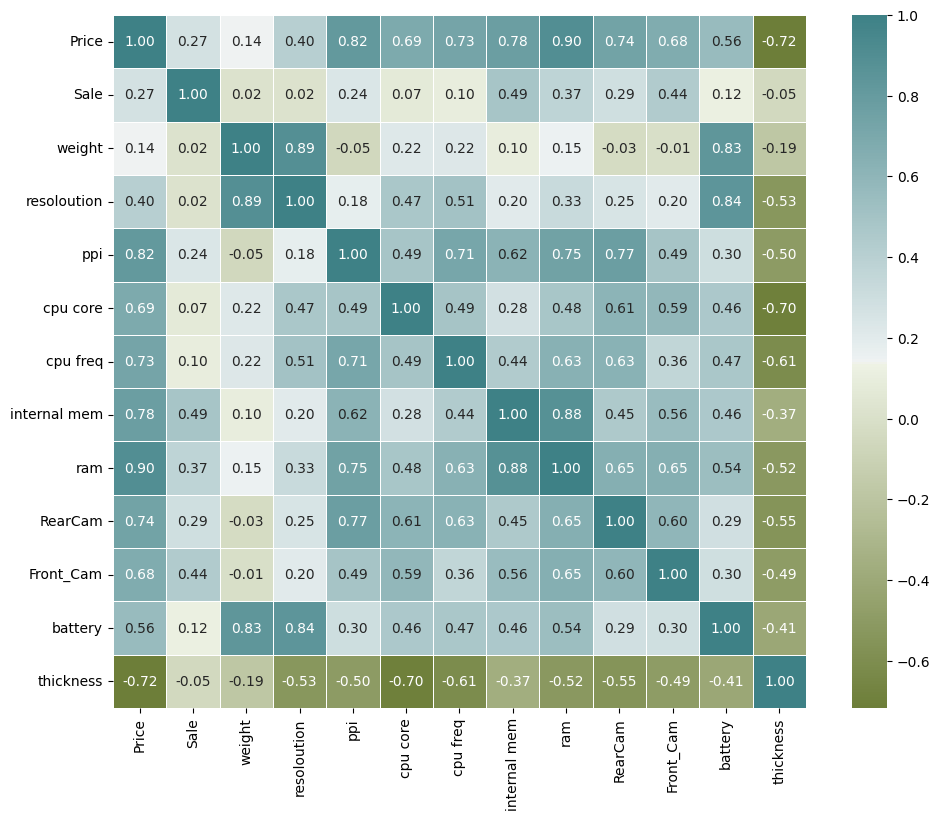

In [16]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)
#your code here

In [17]:
data.drop(['weight'], axis=1, inplace=True) #слабо коррелирует с ценой, зато сильно с разрешением и батареей

In [18]:
X = data.copy().drop('Price', axis=1)

y = data['Price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=56)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
print(f'{ypred_train}\n{ypred_test}')

[3134.19994276 1523.83467992 3230.66389832 2447.46481756 2214.52772297
  955.31003047 2177.56661812 2318.03763178 3620.65133401 1856.55307662
  902.05111867 3056.54904524 1375.06329052 1864.35680978 1720.04900444
 3120.35345574 1413.18495567 3117.33310414 2853.85621787 1597.156944
 2324.86872101  419.61127404 3013.99525069  785.10945897 2669.89932072
 1841.71226648 2328.24381882 2575.4067067  1856.80853616 3659.15765682
 2264.74158099  784.85399943 2716.37615069 2214.19665407 4173.40892194
  901.79565912 2338.05239559 4174.32431865 1498.68927647 2214.65210091
 2236.82767087 1442.97805947 2669.60128458 1523.74952674 2575.3854184
 3625.54764201 2691.06339955 2236.48705814 2015.89887654  649.97153454
 2788.57072724 3134.68957356 2177.60919471 1503.60734771 1514.79289253
 1503.90538384 1412.82305464 3058.86946946 2046.65555093 3015.4215665
 2952.61674173 1734.32233659 1690.80602203 1361.70729571 2404.10817464
 2214.40953702 2357.13373598 1556.75475526 2214.76189422 2608.85052176
 1375.2548

In [19]:
r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test) #я не стала добавлять регуляризацию, потому что, кажется, результат хороший (если я правильно поняла, r2 должен быть как можно ближе к единице?)

(0.9583668103943841, 0.9263589895602895)

In [21]:
mean_squared_error(ypred_test, ytest) ** 0.5 

179.07613770641134

In [22]:
mean_squared_error(ypred_train, ytrain) ** 0.5 

161.35722223758674

In [25]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Sale,-36.203384
1,resoloution,-155.834774
2,ppi,156.841107
3,cpu core,130.587492
4,cpu freq,67.066374
5,internal mem,180.301113
6,ram,163.106862
7,RearCam,26.549536
8,Front_Cam,47.116162
9,battery,180.754219


# Задание 2. 

Поработайте с датасетом diet_data (Его создатель решил похудеть, подсчитывая калории, и ему это действительно удалось; в течение времени, пока худел, он записывал, что и какое он ест). Целевая колонка - change. 

In [157]:
data = pd.read_csv('diet_data.csv')
data.head()

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,7/30/2018,12.0,2.0,6.0,2726.0,1950.0,0.72,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,7/31/2018,12.0,0.0,8.0,2696.0,2600.0,0.96,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,8/1/2018,12.0,1.0,0.0,2704.0,2500.0,0.92,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,8/3/2018,11.0,12.0,8.0,2664.0,2900.0,1.09,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [158]:
data.drop(['Date'], axis=1, inplace=True)

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Stone        142 non-null    float64
 1   Pounds       142 non-null    float64
 2   Ounces       142 non-null    float64
 3   weight_oz    149 non-null    float64
 4   calories     140 non-null    float64
 5   cals_per_oz  147 non-null    object 
 6   five_donuts  140 non-null    float64
 7   walk         140 non-null    float64
 8   run          140 non-null    float64
 9   wine         140 non-null    float64
 10  prot         140 non-null    float64
 11  weight       140 non-null    float64
 12  change       147 non-null    float64
dtypes: float64(12), object(1)
memory usage: 15.5+ KB


In [160]:
set(data.five_donuts)

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan}

In [161]:
data = data.fillna(0)

In [162]:
def map_cals(cals):
    if cals == '#DIV/0!':
        return 0
    else:
        return float(cals)
        
data['cals_per_oz'] = data['cals_per_oz'].apply(map_cals)

<Axes: >

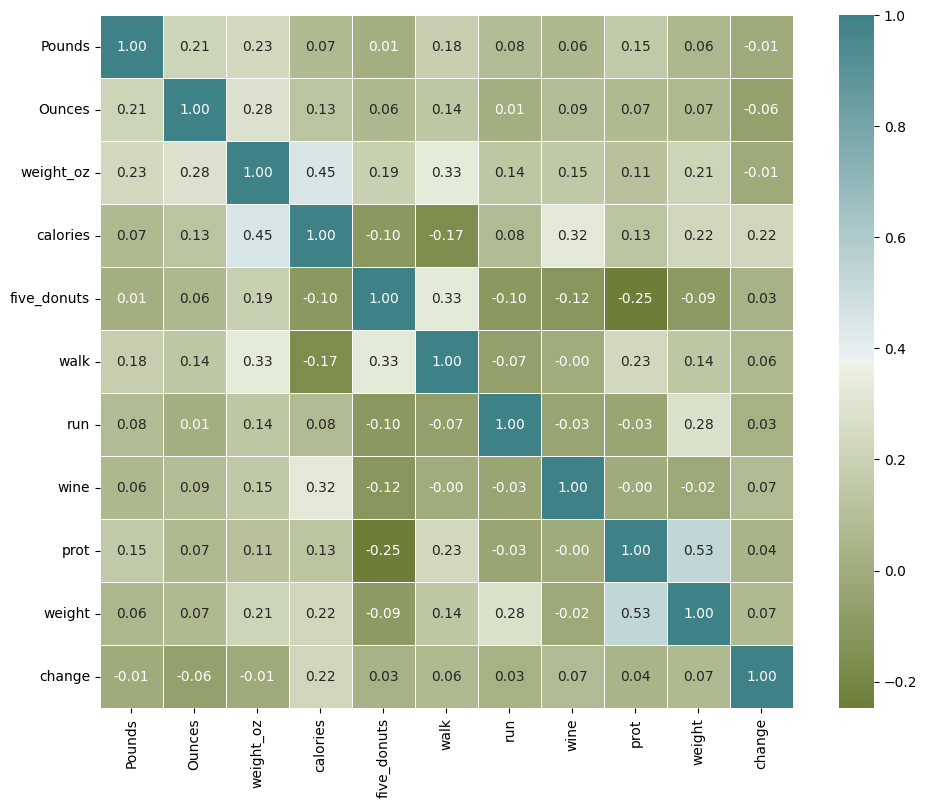

In [165]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [164]:
data.drop(['cals_per_oz', 'Stone',], axis=1, inplace=True)

In [166]:
data.head()

,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
0,2.0,6.0,2726.0,1950.0,1.0,1.0,0.0,0.0,0.0,0.0,-30.0
1,0.0,8.0,2696.0,2600.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0
2,1.0,0.0,2704.0,2500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2704.0,1850.0,1.0,1.0,0.0,1.0,0.0,0.0,-40.0
4,12.0,8.0,2664.0,2900.0,1.0,1.0,0.0,0.0,0.0,0.0,14.0


In [167]:
X = data.copy().drop('change', axis=1)

y = data['change']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=56)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)


In [168]:
r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test) #и с регуляризацией и без низкие результаты получаются, возможно, из-за того, что данные в целом слабо коррелируют (по матрице)

(0.12315660110287963, -7.224191759708447)

In [173]:
mean_squared_error(ypred_test, ytest) 

5716.3695398697755

In [174]:
mean_squared_error(ypred_train, ytrain)

49338.574132232294

In [171]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Pounds,0.738341
1,Ounces,-19.184306
2,weight_oz,-70.124109
3,calories,93.636554
4,five_donuts,24.141813
5,walk,47.471920
6,run,12.051887
7,wine,8.422093
8,prot,0.553871
9,weight,3.686008


In [172]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: -1.7083135679368153 1882.4611142966444
[ -0.         -10.19969939 -32.90200324  64.32305869   7.0719336
  25.76261674   0.           0.           0.           0.        ] 



In [178]:
for a in np.arange(10.1,40.1,5):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=10.1
Scores: -1.674201004219495 1858.7505752117108
[ -0.         -10.11390725 -32.56300133  63.99769844   6.92861011
  25.54287267   0.           0.           0.           0.        ] 

alpha=15.1
Scores: -0.3858509034884674 963.2601139377282
[ -0.          -5.82852655 -15.66340927  47.78046092   0.
  14.49432299   0.           0.           0.           0.        ] 

alpha=20.1
Scores: 0.022791920941027888 679.2257112260469
[-0.         -1.65924515 -0.25727038 33.05550726  0.          1.66429806
  0.          0.          0.          0.        ] 

alpha=25.1
Scores: 0.057020148309226526 655.4347780805089
[-0.         -0.         -0.         27.46338502  0.          0.
  0.          0.          0.          0.        ] 

alpha=30.1
Scores: 0.04967111554351544 660.542852925654
[-0.         -0.         -0.         22.46338502  0.          0.
  0.          0.          0.          0.        ] 

alpha=35.1
Scores: -0.013826617812478181 704.6780724599615
[-0.         -0.         -0.      

In [191]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 100, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075,
         8.1321608 ,   8.63417085,   9.1361809 ,   9.63819095,
        10.14020101,  10.64221106,  11.14422111,  11.64623116,
        12.14824121,  12.65025126,  13.15226131,  13.65427136,
        14.15628141,  14.65829146,  15.1...
        84.43768844,  84.93969849,  85.44170854,  85.94371859,
        86.44572864,  86.94773869,  87.44974874,  87.95175879,
        88.45376884,  88.95577889,  89.45778894,  89.95979899,
        90.46180905,  90.9638191 ,  91.46582915,  91.9678392 ,
        92.46984925,  92.9718593 ,  93.47386935,  93.9758794 ,
        94.47788945,  94.9798995 ,  95.48190955,  95.9839196 ,
        96.48592965,  96.9879397 ,  97.48994975,  97.9919598 ,
        98.49396985,  98.9959799 ,  99.49798995, 100.        ]),
        cv=3, random_state=17)

In [194]:
lasso_cv.alpha_ #я увеличивала интервал для а несколько раз, только на 100 лучшим оказался не крайний конец интервала

69.37738693467337

In [195]:
lasso_cv.coef_

array([ 0.        , -0.        , -0.04663064,  0.03662644,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [196]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.0 -0.6761315065439713


In [226]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha=25, l1_ratio=0.5)
regr.fit(Xtrain, ytrain)

ypred3_train = regr.predict(Xtrain)
ypred3_test = regr.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test), mean_squared_error(ytrain,ypred3_train), mean_squared_error(ytest,ypred3_test))

#с регуляризаторами стало только хуже

Scores: 0.006279323776841483 -0.5096038026331824 55915.07139386109 1049.276749226702


# Задание 3. 

Поработайте с датасетом Life Expectancy. Целевая колонка - Life Expectancy, собственно. 

In [236]:
data = pd.read_csv('Life Expectancy Data.csv')
data.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
582,Colombia,2009,Developing,73.6,15.0,13,4.34,941.646405,92.0,0,...,92.0,7.10,92.0,0.1,5148.422113,45416181.0,2.2,2.0,0.691,12.4
1805,Namibia,2006,Developing,57.0,431.0,3,4.94,459.157240,NaN,3,...,74.0,7.20,86.0,19.2,3881.295350,255734.0,12.6,12.6,0.570,11.4
2891,Yemen,2014,Developing,65.4,228.0,37,0.01,0.000000,73.0,815,...,67.0,5.64,73.0,0.1,NaN,NaN,13.7,13.5,0.500,9.0
1351,Kazakhstan,2010,Developing,67.8,236.0,7,6.83,11.151627,99.0,4,...,98.0,4.42,99.0,0.1,97.649972,16321581.0,2.3,2.5,0.763,14.5
1117,Guyana,2004,Developing,65.1,237.0,1,7.84,1.776181,91.0,0,...,91.0,5.73,91.0,1.9,145.588610,751652.0,5.8,5.6,0.613,11.2
372,Brunei Darussalam,2011,Developing,77.4,79.0,0,0.97,295.773017,93.0,4,...,99.0,2.25,97.0,0.1,4717.273000,NaN,5.9,5.4,0.846,14.1
1320,Japan,2009,Developed,83.0,64.0,3,7.09,899.178528,NaN,741,...,99.0,9.51,97.0,0.1,4855.175640,12847.0,1.8,1.6,0.881,15.0
681,Cyprus,2007,Developed,78.9,63.0,0,11.56,1958.525877,93.0,0,...,97.0,6.50,97.0,0.1,31386.632650,163712.0,0.9,1.0,0.836,13.5
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
2388,Somalia,2004,Developing,51.2,341.0,49,0.01,0.000000,NaN,12008,...,3.0,NaN,3.0,0.9,NaN,NaN,7.6,7.4,NaN,NaN


In [237]:
data.columns = [column.replace(" ", "_") for column in data.columns] 

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy_                 2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles_                         2938 non-null   int64  
 10  _BMI_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   int64  
 12  Polio               

In [239]:
data.drop(['Country',], axis=1, inplace=True)
#Я не хотела удалять страны, но единственный вариант, который я придумала, это вручную разбить их на категории по продолжительности жизни, но так обрабатывать почти 200 стран было бы очень долго

In [240]:
data.Status = data.Status.apply(lambda x: 1 if x == 'Developed' else 0)

In [241]:
data = data.fillna(0)

In [242]:
data.sample(10)

,Year,Status,Life_expectancy_,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles_,_BMI_,...,Polio,Total_expenditure,Diphtheria_,_HIV/AIDS,GDP,Population,_thinness__1-19_years,_thinness_5-9_years,Income_composition_of_resources,Schooling
789,2012,0,75.5,127.0,7,3.92,41.880877,88.0,72,52.1,...,85.0,6.48,87.0,0.1,572.143130,15419666.0,1.3,1.2,0.717,13.3
686,2002,1,78.4,68.0,0,11.68,1128.050886,88.0,0,53.8,...,98.0,6.12,98.0,0.1,16372.291520,976966.0,0.9,1.0,0.805,12.5
921,2008,0,79.6,94.0,0,10.26,678.881120,0.0,5,59.4,...,97.0,8.35,99.0,0.1,5341.314870,5313399.0,0.9,0.8,0.876,17.1
1384,2009,0,65.2,28.0,0,0.54,162.290371,86.0,0,74.6,...,84.0,12.24,86.0,0.1,1297.285141,1568.0,0.1,0.1,0.576,11.9
1598,2003,0,73.1,138.0,3,0.48,264.249613,95.0,632,28.8,...,96.0,3.95,96.0,0.1,4463.675893,2468873.0,9.3,9.1,0.724,12.1
2153,2013,0,65.2,233.0,12,0.01,11.710907,98.0,17,2.1,...,98.0,7.69,98.0,0.5,688.876856,1165151.0,5.9,5.9,0.485,10.8
2680,2000,0,72.9,112.0,4,1.21,264.784220,94.0,47,48.1,...,97.0,5.40,97.0,0.1,2213.914880,9699197.0,6.6,6.5,0.646,12.8
81,2014,0,76.2,118.0,8,7.93,847.371746,94.0,1,62.2,...,92.0,4.79,94.0,0.1,12245.256450,42981515.0,1.0,0.9,0.825,17.3
2780,2013,0,59.7,323.0,86,4.20,0.000000,91.0,185,22.5,...,91.0,5.57,91.0,2.1,0.000000,0.0,6.8,6.7,0.000,0.0
381,2002,0,74.8,95.0,0,0.13,941.703687,99.0,0,28.0,...,99.0,3.40,94.0,0.1,16846.219800,0.0,6.7,6.1,0.820,13.3


<Axes: >

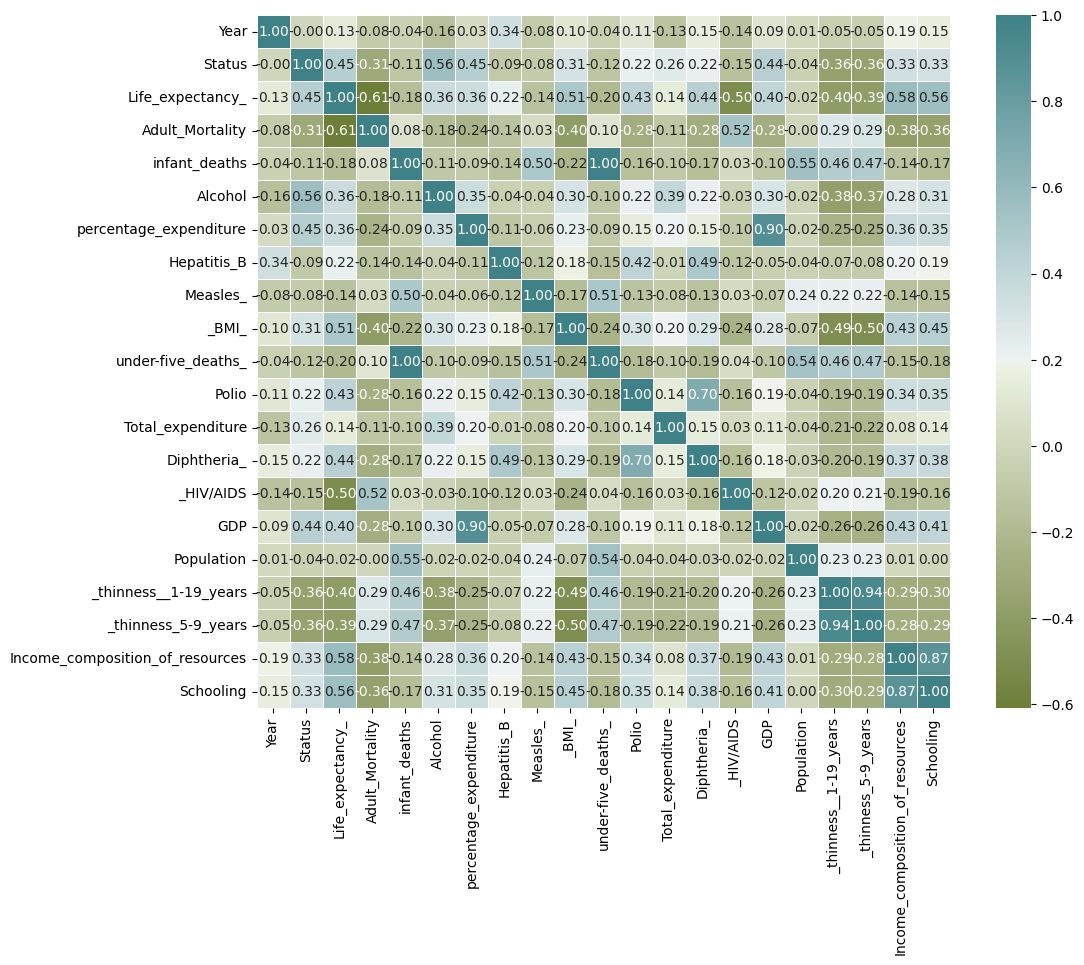

In [243]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)


In [245]:
data.drop(['infant_deaths', 'Total_expenditure', 'Schooling', 'Population', 'Year', '_thinness_5-9_years'], axis=1, inplace=True)

In [247]:
X = data.copy().drop('Life_expectancy_', axis=1)

y = data['Life_expectancy_']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=56)

scaler = StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)


In [248]:
r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test)

(0.6478293921821889, 0.680180560372989)

In [249]:
mean_squared_error(ypred_test, ytest) ** 0.5 

5.557828880084107

In [250]:
mean_squared_error(ypred_train, ytrain) ** 0.5 

6.19893797238322

In [251]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Status,1.205110
1,Adult_Mortality,-2.141996
2,Alcohol,0.924416
3,percentage_expenditure,-0.161523
4,Hepatitis_B,0.359776
5,Measles_,-0.156282
6,_BMI_,1.065171
7,under-five_deaths_,-0.261787
8,Polio,0.761327
9,Diphtheria_,0.764373


In [252]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: -0.0008507242740998233 96.66623239466253
[ 0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0. -0.  0.] 



In [263]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 100, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=111)
lasso_cv.fit(X, y)

LassoCV(alphas=array([  0.1       ,   0.60201005,   1.1040201 ,   1.60603015,
         2.1080402 ,   2.61005025,   3.1120603 ,   3.61407035,
         4.1160804 ,   4.61809045,   5.1201005 ,   5.62211055,
         6.1241206 ,   6.62613065,   7.1281407 ,   7.63015075,
         8.1321608 ,   8.63417085,   9.1361809 ,   9.63819095,
        10.14020101,  10.64221106,  11.14422111,  11.64623116,
        12.14824121,  12.65025126,  13.15226131,  13.65427136,
        14.15628141,  14.65829146,  15.1...
        84.43768844,  84.93969849,  85.44170854,  85.94371859,
        86.44572864,  86.94773869,  87.44974874,  87.95175879,
        88.45376884,  88.95577889,  89.45778894,  89.95979899,
        90.46180905,  90.9638191 ,  91.46582915,  91.9678392 ,
        92.46984925,  92.9718593 ,  93.47386935,  93.9758794 ,
        94.47788945,  94.9798995 ,  95.48190955,  95.9839196 ,
        96.48592965,  96.9879397 ,  97.48994975,  97.9919598 ,
        98.49396985,  98.9959799 ,  99.49798995, 100.        ]),
        cv=3, random_state=111)

In [264]:
lasso_cv.alpha_

0.1

In [265]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))  #почти ничего не поменялось

Scores: 0.6474197819660951 0.6803675613711426


In [266]:
from sklearn.linear_model import Ridge

for a in np.arange(10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

In [271]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 10, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.14895100e-02, 1.32008840e-02, 1.51671689e-02,
       1.74263339e-02, 2.00220037e-02, 2.30043012e-02, 2.64308149e-02,
       3.03677112e-02, 3.48910121e-02, 4.00880633e-02, 4.60592204e-02,
       5.29197874e-02, 6.08022426e-02, 6.98587975e-02, 8.02643352e-02,
       9.22197882e-02, 1.05956018e-01, 1.21738273e-01, 1.39871310e-01,
       1.60705282e-01, 1.84642494e-0...
       4.10265811e+08, 4.71375313e+08, 5.41587138e+08, 6.22257084e+08,
       7.14942899e+08, 8.21434358e+08, 9.43787828e+08, 1.08436597e+09,
       1.24588336e+09, 1.43145894e+09, 1.64467618e+09, 1.88965234e+09,
       2.17111795e+09, 2.49450814e+09, 2.86606762e+09, 3.29297126e+09,
       3.78346262e+09, 4.34701316e+09, 4.99450512e+09, 5.73844165e+09,
       6.59318827e+09, 7.57525026e+09, 8.70359136e+09, 1.00000000e+10]),
        cv=3, scoring='neg_mean_squared_error')

In [272]:
ridge_cv.alpha_

18.04186409392072

In [273]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test)) #стало хуже

Scores: 0.0 -0.0008507242740998233
